# Cumulative app version of fig 5

Cumulative yield

In [5]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd

import itertools

from tqdm import tqdm

import seaborn as sns

from math import floor

import pickle


from matplotlib.colors import BoundaryNorm

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt

import shap


from plots2.fns import (
    get_corner_annotations,
    get_dose_colors
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE,
)

from poly2.utils import (
    get_dispersal_kernel,
    trait_vec,
    beta_dist,
    gamma_dist,
    get_dist_var,
    get_dist_mean,
    edge_values,
    object_load, 
    object_dump,
    get_best_dose_for_cb
)

from poly2.config import Config
from poly2.consts import FUNG_DECAY_RATE, MUTATION_PROP, MUTATION_SCALE

from poly2.run import get_data_from_pars

# Load SHAP values

In [7]:
shap_values = object_load('../outputs/SHAP/cumulative.pickle')

# Fig

In [9]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None



In [11]:
default_b = cf.k_b
default_mu = cf.k_mu
a = cf.k_mu * cf.k_b

max_effect_mean = (default_b/(default_b+1))**a

In [14]:
shap_values.values.min(), shap_values.values.max()

(-0.3574236, 0.39035738)

In [15]:
ymin = -0.45
ymax = 0.45

Wall time: 1min 15s


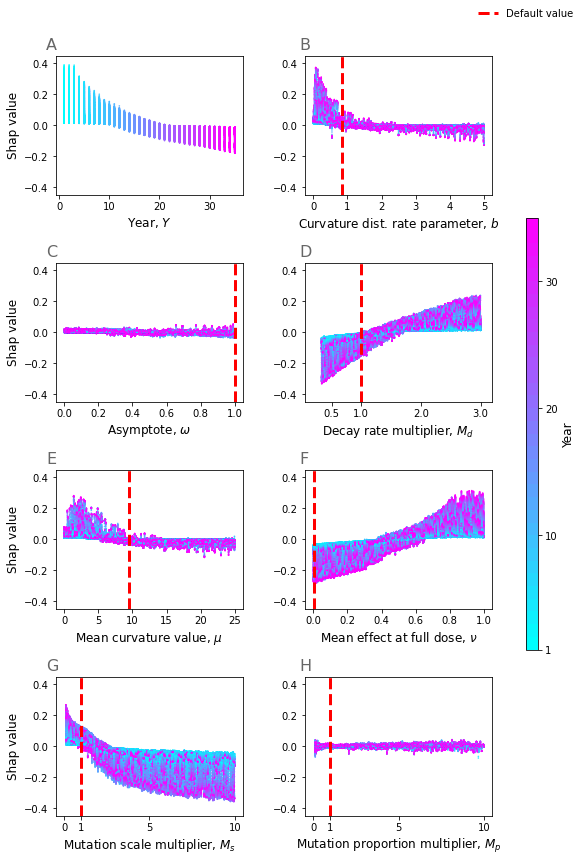

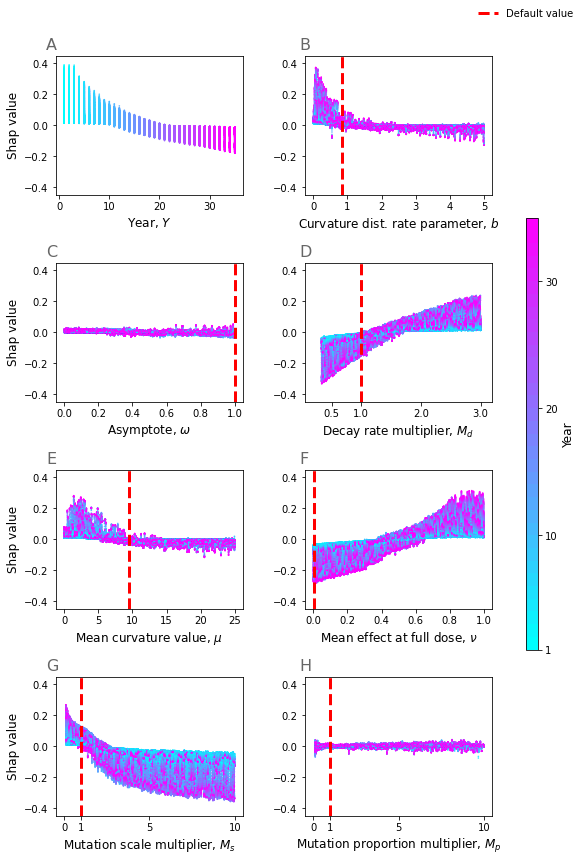

In [16]:
%%time

plt.close('all')

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


f, ax = plt.subplots(4, 2, figsize=(8, 12))

alpha = 0.8
size = 0.4

# DATA

clrmap = plt.cm.cool  # define the colormap
cmaplist = [clrmap(i) for i in range(clrmap.N)]

cm3 = LinearSegmentedColormap.from_list("", cmaplist, clrmap.N)

bounds = np.linspace(1, 35, 35)
norm = BoundaryNorm(bounds, clrmap.N)

cmap3 = ScalarMappable(cmap=cm3, norm=norm)


colors3 = cmap3.to_rgba(shap_values[:, 'year'].data)

# A
ax[0][0].scatter(
    shap_values[:, "year"].data,
    shap_values[:, "year"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# B
ax[0][1].scatter(
    shap_values[:, "b"].data,
    shap_values[:, "b"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# C
ax[1][0].scatter(
    shap_values[:, "asymp"].data,
    shap_values[:, "asymp"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# D
ax[1][1].scatter(
    shap_values[:, "dec_rate"].data,
    shap_values[:, "dec_rate"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# E
ax[2][0].scatter(
    shap_values[:, "mu"].data,
    shap_values[:, "mu"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# F
ax[2][1].scatter(
    shap_values[:, "ME_mean"].data,
    shap_values[:, "ME_mean"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)


# G
ax[3][0].scatter(
    shap_values[:, "m_scale"].data,
    shap_values[:, "m_scale"].values,
    alpha=alpha, 
    color=colors3, 
    s=size,
)

# H
ax[3][1].scatter(
    shap_values[:, "m_prop"].data, 
    shap_values[:, "m_prop"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)




# LAYOUT

# A
ax[0][0].set_xlabel(r'Year, $Y$')


# B
ax[0][1].set_xlabel(r'Curvature dist. rate parameter, $b$')
ax[0][1].axvline(cf.k_b, color='r', label='Default value', ls='--', lw=3)


# C
ax[1][0].set_xlabel(r'Asymptote, $\omega$')
ax[1][0].set_xlim([-0.05,1.05])
ax[1][0].axvline(1, color='r', ls='--', lw=3)


# D
ax[1][1].set_xlabel(r'Decay rate multiplier, $M_d$')
ax[1][1].set_xlim([0.05, 3.2])
ax[1][1].set_xticks([0.5, 1, 2, 3])
ax[1][1].axvline(1, color='r', ls='--', lw=3)

# E
ax[2][0].set_xlabel(r'Mean curvature value, $\mu$')
ax[2][0].axvline(cf.k_mu, color='r', ls='--', lw=3)


# F
ax[2][1].set_xlabel(r'Mean effect at full dose, $\nu$')
ax[2][1].set_xlim([-0.05,1.05])
ax[2][1].axvline(max_effect_mean, color='r', ls='--', lw=3)


# G
ax[3][0].set_xlabel(r'Mutation scale multiplier, $M_s$')
ax[3][0].set_xlim([-0.5,10.5])
ax[3][0].set_xticks([0, 1, 5, 10])
ax[3][0].axvline(1, color='r', ls='--', lw=3)


# H
ax[3][1].set_xlabel(r'Mutation proportion multiplier, $M_p$')
ax[3][1].set_xlim([-0.5,10.5])
ax[3][1].set_xticks([0, 1, 5, 10])
ax[3][1].axvline(1, color='r', ls='--', lw=3)


for ii, jj in itertools.product(np.arange(4), np.arange(2)):
    ax[ii][jj].spines['top'].set_visible(True)
    ax[ii][jj].spines['right'].set_visible(True)
    

    ax[ii][jj].set_ylim([ymin, ymax])
    
    if jj==0:
        ax[ii][jj].set_ylabel('Shap value')
    else:
        ax[ii][jj].set_ylabel('')




f.patch.set_facecolor('white')

f.align_ylabels()

plt.tight_layout(rect=[0, 0, 0.88, 0.95], h_pad=3, w_pad=3)

xx = 0.92
dx = 0.02
dy = 0.3

cax3 = plt.axes([xx, 0.25, dx, 0.5])
plt.colorbar(cmap3, cax=cax3, label='Year', ticks=[1, 10, 20, 30])

get_corner_annotations(2, 4, 0.08, 0.94, 0.44, 0.2395, plt)

f.legend(
    loc=1,
    framealpha=0,
)

f

In [17]:
f.savefig('../figures/paper/app5_fig4.jpg', dpi=1200)